<a href="https://colab.research.google.com/github/priyansh2003/AI_Interviewer_Bot/blob/main/finance_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finance/data.csv', encoding = "ISO-8859-1")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [ ]:
import pandas as pd
df['combined'] = df.iloc[:, 2:26].apply(lambda row: ' '.join(row.dropna()), axis=1)
df.drop(df.columns[2:26], axis=1, inplace=True)


In [ ]:
df.head()

,Date,Label,Top25,combined
0,2000-01-03,0,Recovering a title,A 'hindrance to operations': extracts from the...
1,2000-01-04,0,Millennium bug fails to bite,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Useful links,Coventry caught on counter by Flo United's riv...
3,2000-01-06,1,Lessons of law's hard heart,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Gone aloft,Hitches and Horlocks Beckham off but United su...


In [ ]:
df2 = df.copy()
df2.drop(columns=['Top25'], inplace=True)
df2.head()


,Date,Label,combined
0,2000-01-03,0,A 'hindrance to operations': extracts from the...
1,2000-01-04,0,Scorecard The best lake scene Leader: German s...
2,2000-01-05,0,Coventry caught on counter by Flo United's riv...
3,2000-01-06,1,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Hitches and Horlocks Beckham off but United su...


In [ ]:
train = df2[df2['Date'] < '20150101']
test = df2[df2['Date'] > '20141231']

In [ ]:
df2 = train[['Date', 'Label', 'combined']]
df2['combined'].replace("[^a-zA-Z]", " ", regex=True, inplace=True)
df2.columns = ['Date', 'Label', 'combined']
df2.head(5)

,Date,Label,combined
0,2000-01-03,0,A hindrance to operations extracts from the...
1,2000-01-04,0,Scorecard The best lake scene Leader German s...
2,2000-01-05,0,Coventry caught on counter by Flo United s riv...
3,2000-01-06,1,Pilgrim knows how to progress Thatcher facing ...
4,2000-01-07,1,Hitches and Horlocks Beckham off but United su...


In [ ]:
for index in df2.columns:
    if index != 'Label':
        df2[index] = df2[index].str.lower()
df2.head(5)

,Date,Label,combined
0,2000-01-03,0,a hindrance to operations extracts from the...
1,2000-01-04,0,scorecard the best lake scene leader german s...
2,2000-01-05,0,coventry caught on counter by flo united s riv...
3,2000-01-06,1,pilgrim knows how to progress thatcher facing ...
4,2000-01-07,1,hitches and horlocks beckham off but united su...


In [ ]:
headlines = df2['combined']
print(headlines[0])

a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out


In [ ]:
headlines[:3975]
len(headlines)

3975

In [ ]:
def handle_length_mismatch(df, headlines):
  if len(headlines) < len(df2):
    headlines.extend([''] * (len(df2) - len(headlines)))
  return df, headlines

df, headlines = handle_length_mismatch(df2.copy(), headlines.copy())
num_cols = len(df2.columns)

df.insert(num_cols, 'headline', headlines)



LOGISTIC REGRESSION!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df2['combined'], df2['Label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)

X_test_vectorized = vectorizer.transform(X_test)

log_reg = LogisticRegression()

log_reg.fit(X_train_vectorized, y_train)

predictions = log_reg.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

X_vectorized = vectorizer.transform(df2['combined'])
df2['Predicted_Sentiment'] = log_reg.predict(X_vectorized)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5006289308176101
        Date  Label                                           combined  \
0 2000-01-03      0  a  hindrance to operations   extracts from the...   
1 2000-01-04      0  scorecard the best lake scene leader  german s...   
2 2000-01-05      0  coventry caught on counter by flo united s riv...   
3 2000-01-06      1  pilgrim knows how to progress thatcher facing ...   
4 2000-01-07      1  hitches and horlocks beckham off but united su...   

   Predicted_Sentiment  
0                    0  
1                    0  
2                    0  
3                    1  
4                    1  


In [ ]:
df2.head()

,Date,Label,combined,Predicted_Sentiment
0,2000-01-03,0,a hindrance to operations extracts from the...,0
1,2000-01-04,0,scorecard the best lake scene leader german s...,0
2,2000-01-05,0,coventry caught on counter by flo united s riv...,0
3,2000-01-06,1,pilgrim knows how to progress thatcher facing ...,1
4,2000-01-07,1,hitches and horlocks beckham off but united su...,1


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47       384
           1       0.52      0.54      0.53       411

    accuracy                           0.50       795
   macro avg       0.50      0.50      0.50       795
weighted avg       0.50      0.50      0.50       795



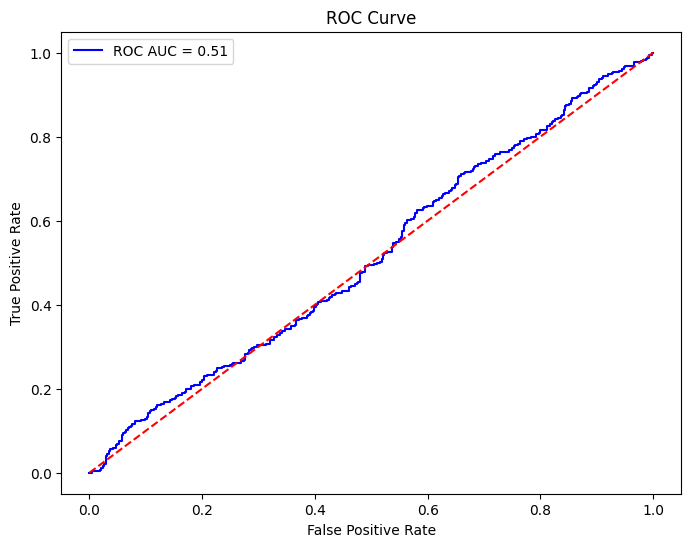

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probabilities = log_reg.predict_proba(X_test_vectorized)[:, 1]

roc_auc = roc_auc_score(y_test, probabilities)

fpr, tpr, thresholds = roc_curve(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


PORTFOLIO RETURNS!

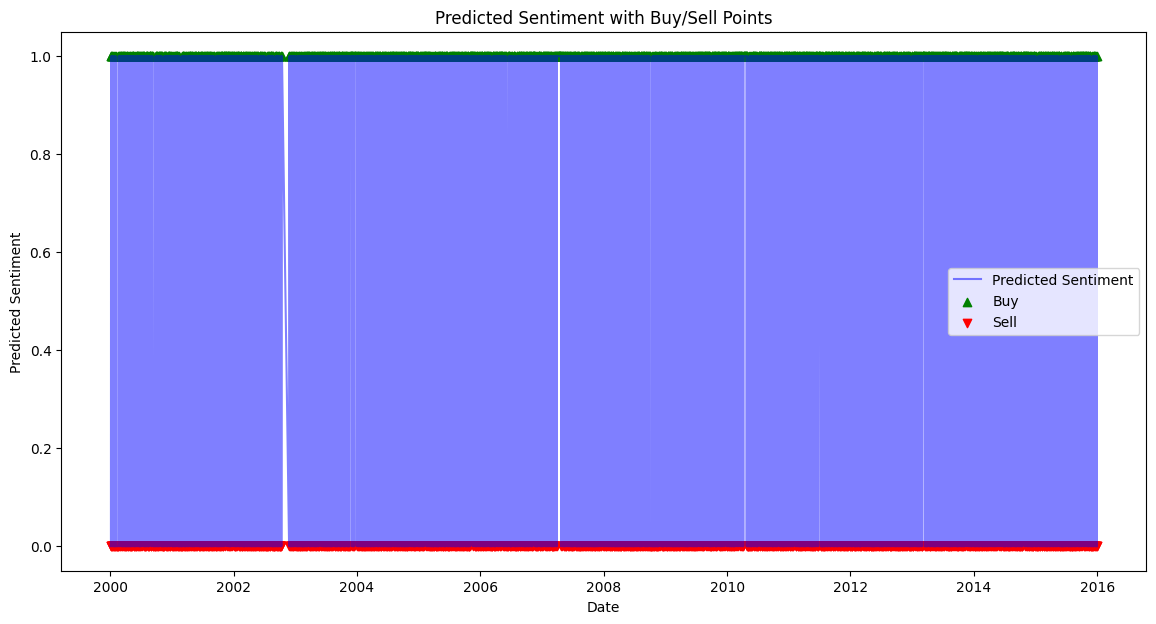

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' column is in datetime format
df2['Date'] = pd.to_datetime(df2['Date'])

# Sort dataframe by date
df2.sort_values('Date', inplace=True)

# Identify buy and sell points based on predicted sentiment data
buy_points = df2[df2['Predicted_Sentiment'] == 1]['Date']
sell_points = df2[df2['Predicted_Sentiment'] == 0]['Date']

# Plot predicted sentiment data with buy and sell points
plt.figure(figsize=(14, 7))
plt.plot(df2['Date'], df2['Predicted_Sentiment'], label='Predicted Sentiment', color='blue', alpha=0.5)
plt.scatter(buy_points, [1]*len(buy_points), color='green', label='Buy', marker='^', alpha=1)
plt.scatter(sell_points, [0]*len(sell_points), color='red', label='Sell', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel('Predicted Sentiment')
plt.title('Predicted Sentiment with Buy/Sell Points')
plt.legend()
plt.show()



In [ ]:
# Inspect the distribution of the predicted sentiment values
print(df2['Predicted_Sentiment'].value_counts())
print(df2['Label'].value_counts())


Predicted_Sentiment
1    2113
0    1862
Name: count, dtype: int64
Label
1    2096
0    1879
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[*********************100%%**********************]  1 of 1 completed


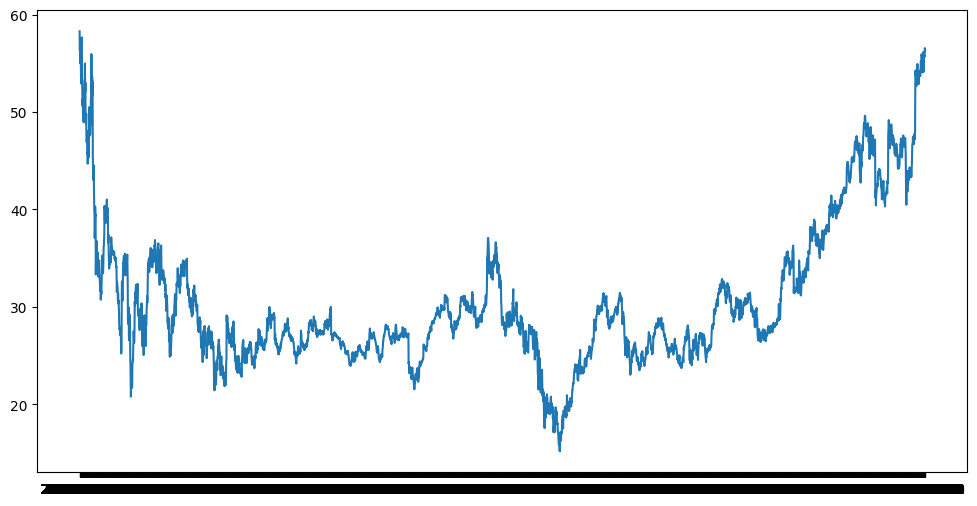

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import yfinance as yf
import matplotlib.pyplot as plt
import re
import nltk

nltk.download('stopwords')
stop_words_set = set(stopwords.words("english"))

sentiment_mapping = {1: "positive", 0: "negative"}
df["Sentiment"] = df["Label"].map(sentiment_mapping)

vectorizer = TfidfVectorizer(max_features=2000)
features = vectorizer.fit_transform(df["headline"])

if "Sentiment" in df.columns:
  X_train, X_test, y_train, y_test = train_test_split(features, df["Sentiment"], test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

def predict_sentiment(headline):

  headline_features = vectorizer.transform([clean_text(headline)])
  return model.predict(headline_features)[0]

initial_balance = 100000
portfolio = []

ticker = "MSFT"
prices = yf.download(ticker, start=df["Date"].min(), end=df["Date"].max())["Close"]

for i in range(len(df)):
  headline = df["headline"].iloc[i]
  sentiment = df["Sentiment"].iloc[i]
  price = prices.iloc[i]

  if sentiment == "positive" and len(portfolio) == 0:
    shares = initial_balance // price
    portfolio.append({"date": df["Date"].iloc[i], "shares": shares, "price": price})
  elif sentiment == "negative" and len(portfolio) > 0:
    portfolio.append({"date": df["Date"].iloc[i], "shares": 0, "price": price})

total_value = 0
for trade in portfolio:
  if trade["shares"] > 0:
    total_value += trade["shares"] * prices.iloc[-1]
  else:
    total_value += initial_balance

returns = (total_value - initial_balance) / initial_balance * 100
prices = prices.reindex(df["Date"]).fillna(np.nan)

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], prices, label="Price")



In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

ticker = "MSFT"
prices = yf.download(ticker, start=df["Date"].min(), end=df["Date"].max())["Close"]

df_with_prices = pd.concat([df, prices], axis=1)

x = df_with_prices["Date"]
y = df_with_prices["Close"]

prices = prices.reindex(df["Date"]).fillna(np.nan)

portfolio_value = initial_balance + sum([trade["shares"] * prices.iloc[-1] for trade in portfolio])
returns = (portfolio_value - initial_balance) / initial_balance

num_trades = len(portfolio)

num_wins = sum([trade["shares"] > 0 for trade in portfolio])
win_ratio = num_wins / num_trades

max_drawdown = (prices.max() - prices.min()) / prices.max()
risk_free_rate = 0.02

sharpe_ratio = (returns.mean() - risk_free_rate) / returns.std()

print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
print("Number of Trades Executed:", num_trades)
print("Win Ratio:", win_ratio)

x = df_with_prices["Date"].tolist()
y = df_with_prices["Close"].tolist()

[*********************100%%**********************]  1 of 1 completed

Sharpe Ratio: nan
Maximum Drawdown: 0.7400536258482742
Number of Trades Executed: 1877
Win Ratio: 0.0005327650506126798
